In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')




In [2]:
# File to Load (Remember to Change These)
clinical_df = pd.read_csv("raw_data/clinicaltrial_data.csv")
mouse_df = pd.read_csv("raw_data/mouse_drug_data.csv")


In [3]:
# Read the Clinical Trial Data
clinical_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Read the Mouse Data
mouse_df.head(5)

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [74]:
# Combine the data into a single dataset
# Merge two dataframes using a left join

drugtrial_df = pd.merge(clinical_df, mouse_df, on="Mouse ID", how="left")

drugtrial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [81]:
print("Tumor Response Treatment")

Tumor Response Treatment


In [73]:
#********** TUMOR RESPONSE TREATMENT **************
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean_df = drugtrial_df[['Drug','Timepoint','Tumor Volume (mm3)']].groupby(['Drug','Timepoint']).mean()

# Convert to DataFrame
tumor_mean_df = tumor_mean_df.reset_index()

# Preview DataFrame
tumor_mean_df.head(100)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [70]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem_df = drugtrial_df[['Drug','Timepoint','Tumor Volume (mm3)']].groupby(['Drug','Timepoint']).sem()

# Convert to DataFrame
tumor_sem_df = tumor_sem_df.reset_index()

# Preview DataFrame
tumor_sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [75]:
# Minor Data Munging to Re-Format the Data Frames
mean_reformat = tumor_mean_df.reset_index()
mean_pivot = mean_reformat.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

error_reformat = tumor_sem_df.reset_index()
error_pivot = error_reformat.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']


# Preview that Reformatting worked
mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


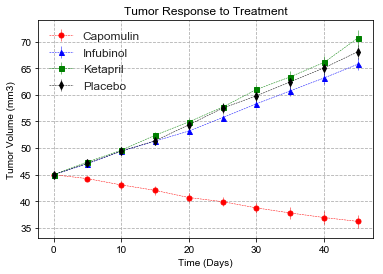

In [76]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 10)
x_limit = 45

plt.figure(figsize=(6,4))

plt.errorbar(mean_pivot.index, mean_pivot["Capomulin"], yerr=error_pivot["Capomulin"],\
             color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_pivot.index, mean_pivot["Infubinol"], yerr=error_pivot["Infubinol"],\
             color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_pivot.index, mean_pivot["Ketapril"],yerr=error_pivot["Ketapril"],\
             color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mean_pivot.index, mean_pivot["Placebo"],yerr=error_pivot["Placebo"],\
             color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)


# plt.ylim(20, 80)
# plt.xlim(0, 45)

# Set x and y axis labels including the title of the chart

plt.title("Tumor Response to Treatment")# Give plot main title
plt.xlabel("Time (Days)") # set text for the x axis
plt.ylabel("Tumor Volume (mm3)") # set text for the y axis

plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")

plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12, fancybox=True)

# Save the figure
plt.savefig("TumerResponseTreatment.png")

# Show the plot
plt.show()

In [82]:
print("Metastatic Response to Treatment")

Metastatic Response to Treatment


In [78]:
#*****************Metastatic Response to Treatment***********************************

# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_mean = drugtrial_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']

# Convert to DataFrame
meta_mean_df = pd.DataFrame(meta_mean)

# Preview DataFrame
meta_mean_df.head(25)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308
Infubinol 0                  0.000000
          5                  0.280000
          10                 0.666667
          15                 0.904762
          20                 1.050000

In [79]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_error = drugtrial_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']

# Convert to DataFrame
meta_error_df = pd.DataFrame(meta_error)

# Preview DataFrame
meta_error_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [80]:
# Minor Data Munging to Re-Format the Data Frames
meta_mean_reformat = meta_mean_df.reset_index()
meta_mean_pivot = meta_mean_reformat.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

meta_error_reformat = meta_error_df.reset_index()
meta_error_pivot = meta_error_reformat.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
